<a href="https://colab.research.google.com/github/uofldmlab/IntroDMLab/blob/main/demo_lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab #01: Exploring Data

*Click the Google Colab image at the top of the page to launch the lab in Google Colab:*screenshot-2021-09-08-9-15-39- (1).png

The following link provides a brief tutorial on how to use Google Colab: [https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow](https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow)

# Import Python Libraries

Importing Python libraries extend data-type and function capabilites that are outside the core Python language. The Pandas library is a Python library that is is widely used to open, view, manipulate, and analyze data.

In [1]:
import pandas as pd #import pandas

# Open Data
We will use the pandas read_csv() function to import a CSV file from a URL and store the data into a Pandas dataframe.


In [2]:
#open datafile and store into Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/insurance.csv")

#Data Types
The dtypes attribute of the Pandas dataframe provides the datatypes of each of the fields in the dataframe

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#Display Data
The Pandas dataframe provides a data structure of rows and columns of the dataset we read in. The *head()* function is used to display the first few rows of the dataframe.

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


By default the *head()* function will display the 5 rows of the dataframe, but additional rows can be displayed by supplying the desired number of rows as a parameter.

In [14]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Only desired columns can be displayed by supplying column names.

In [15]:
df[['age','bmi']].head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


#Dataframe Size
The shape attribute of the Pandas dataframe provides the number of rows and columns within the dataframe (rows, columns).

In [16]:
df.shape

(1338, 7)

#Filtering Data

Select rows can be filtered.  For instance is we only wanted to display only the rows where the sex=='male'. 

In [7]:
df[df['sex']=='male']

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


The following shows how to display records where the charges were less than $2,000. Standard boolean operators can be used here (==, !=, <=, >=, <, >)

In [17]:
df[df['charges']<2000]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
12,23,male,34.400,0,no,southwest,1826.84300
15,19,male,24.600,1,no,southwest,1837.23700
22,18,male,34.100,0,no,southeast,1137.01100
35,19,male,20.425,0,no,northwest,1625.43375
...,...,...,...,...,...,...,...
1295,20,male,22.000,1,no,southwest,1964.78000
1296,18,male,26.125,0,no,northeast,1708.92575
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270


Use the len() function to count the number of rows.  We can also use and(&)/or(|) logic.

How many men are younger than 19 in the dataset?

In [19]:
len(df[(df['sex']=='male')&(df['age']<19)])

36

#Descibe the Data
The describe() function of the Pandas dataframe provides the numeric descriptive statistics of all of the numeric columns.

In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Descibe the Data (with groupby)
By using the groupby() function on the dataframe we can compare the descriptive statistics of BMI between each of the values of the "sex" field.

In [10]:
df.groupby(["sex"])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


#Boxplot
By using the boxplot function we can compare "resting_blood_pressure" between the "sex" values.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


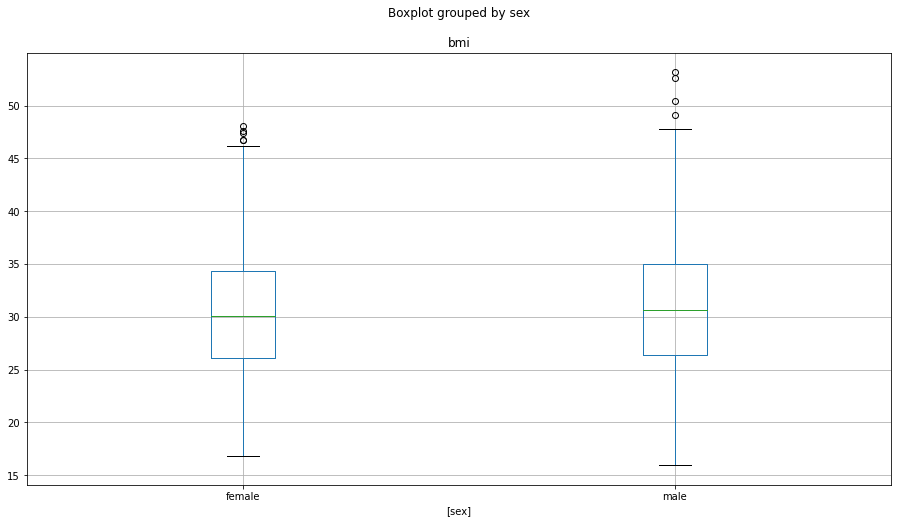

In [13]:
df[['sex','bmi']].boxplot(by="sex",figsize=(15, 8))

#Histogram

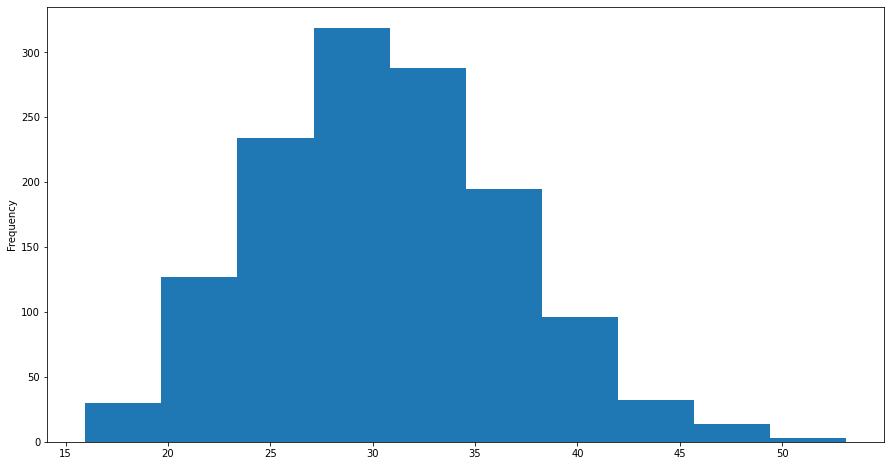

In [12]:
ax = df['bmi'].plot.hist(figsize=(15, 8))